# 1.导入模块函数

In [6]:
import numpy as np # numpy计算库
import matplotlib.pyplot as plt # matplotlib绘图库
import myFEM as fem # 导入我写的有限元方法计算库

# 2.设置材料参数

In [7]:
P = 10e3 #外载荷
a = 100e-2 #边长
f = 20e-4 #横截面积
E = 7e6 * 10**4 #弹性模量
mu = 0.3 #泊松比，似乎没有用到

# 3.布置节点 + 预设约束 + 系统生成

In [8]:
nodeList = list() #节点列表，预设为空

for i in range(4): #1-8节点加入
    tmp1 = fem.Node(0 , i * a , Px = 0 , Py = 0)
    tmp2 = fem.Node(a , i * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

nodeList.append( fem.Node(a , 4*a , Px = 0 , Py = 0) ) #9节点

for i in range(5): #10-19节点
    tmp1 = fem.Node( (2 + i) * a , 3 * a , Px = 0 , Py = 0)
    tmp2 = fem.Node( (2+i) * a , 4 * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

nodeList.append( fem.Node(7 * a , 3 * a , Px = 0 , Py = 0) ) #20节点

for i in range(3): #剩余节点
    tmp1 = fem.Node( 6 * a , (2 - i) * a , Px = 0 , Py = 0)
    tmp2 = fem.Node( 7*a , (2 - i) * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

sys = fem.SysPole(nodeList) #系统生成

for i in [1 , 2 , 25 , 26]: #支座的约束生成
    sys.setUV(i , u = 0 , v = 0)
    sys.setP(i , Px = np.NaN , Py = np.NaN)
    pass

for i in [13 , 15]: #给定的外载荷约束
    sys.setP(i , Px = 0 , Py = - P)
    pass

del i , tmp1 , tmp2

successfully build system !


# 4.连接节点 + generate()获取刚度矩阵

In [9]:
for i in [1 , 3 , 5 , 8 , 10 , 12 , 14 , 16]: # 连接 5 根杆节点
    sys.connect(i , i+2 , E , f)
    sys.connect(i , i+3 , E , f)
    sys.connect(i+1 , i+2 , E , f)
    sys.connect(i+1 , i+3 , E , f)
    sys.connect(i+2 , i+3 , E , f)
    pass

for i in [26 , 24]: # 连接 5 根杆节点
    sys.connect(i-2 , i , E , f)
    sys.connect(i-3 , i , E , f)
    sys.connect(i-2 , i-1 , E , f)
    sys.connect(i-3 , i-1 , E , f)
    sys.connect(i-3 , i-2 , E , f)
    pass

# 连接剩下的节点
sys.connect(7 , 9 , E , f)
sys.connect(8 , 9 , E , f)
sys.connect(19 , 20 , E , f)
sys.connect(18 , 20 ,E , f)
sys.connect(18 , 22 , E , f)
sys.connect(18 , 21 , E , f)
sys.connect(20 , 22 , E , f)
sys.connect(20 , 21 , E , f)

del i

# 系统生成
sys.generate()

successfully get matrix K !


# 5.求解 + 重置图片 + 导出报告以及图片

successfully update node infomation !
successfully write to file hw.txt !


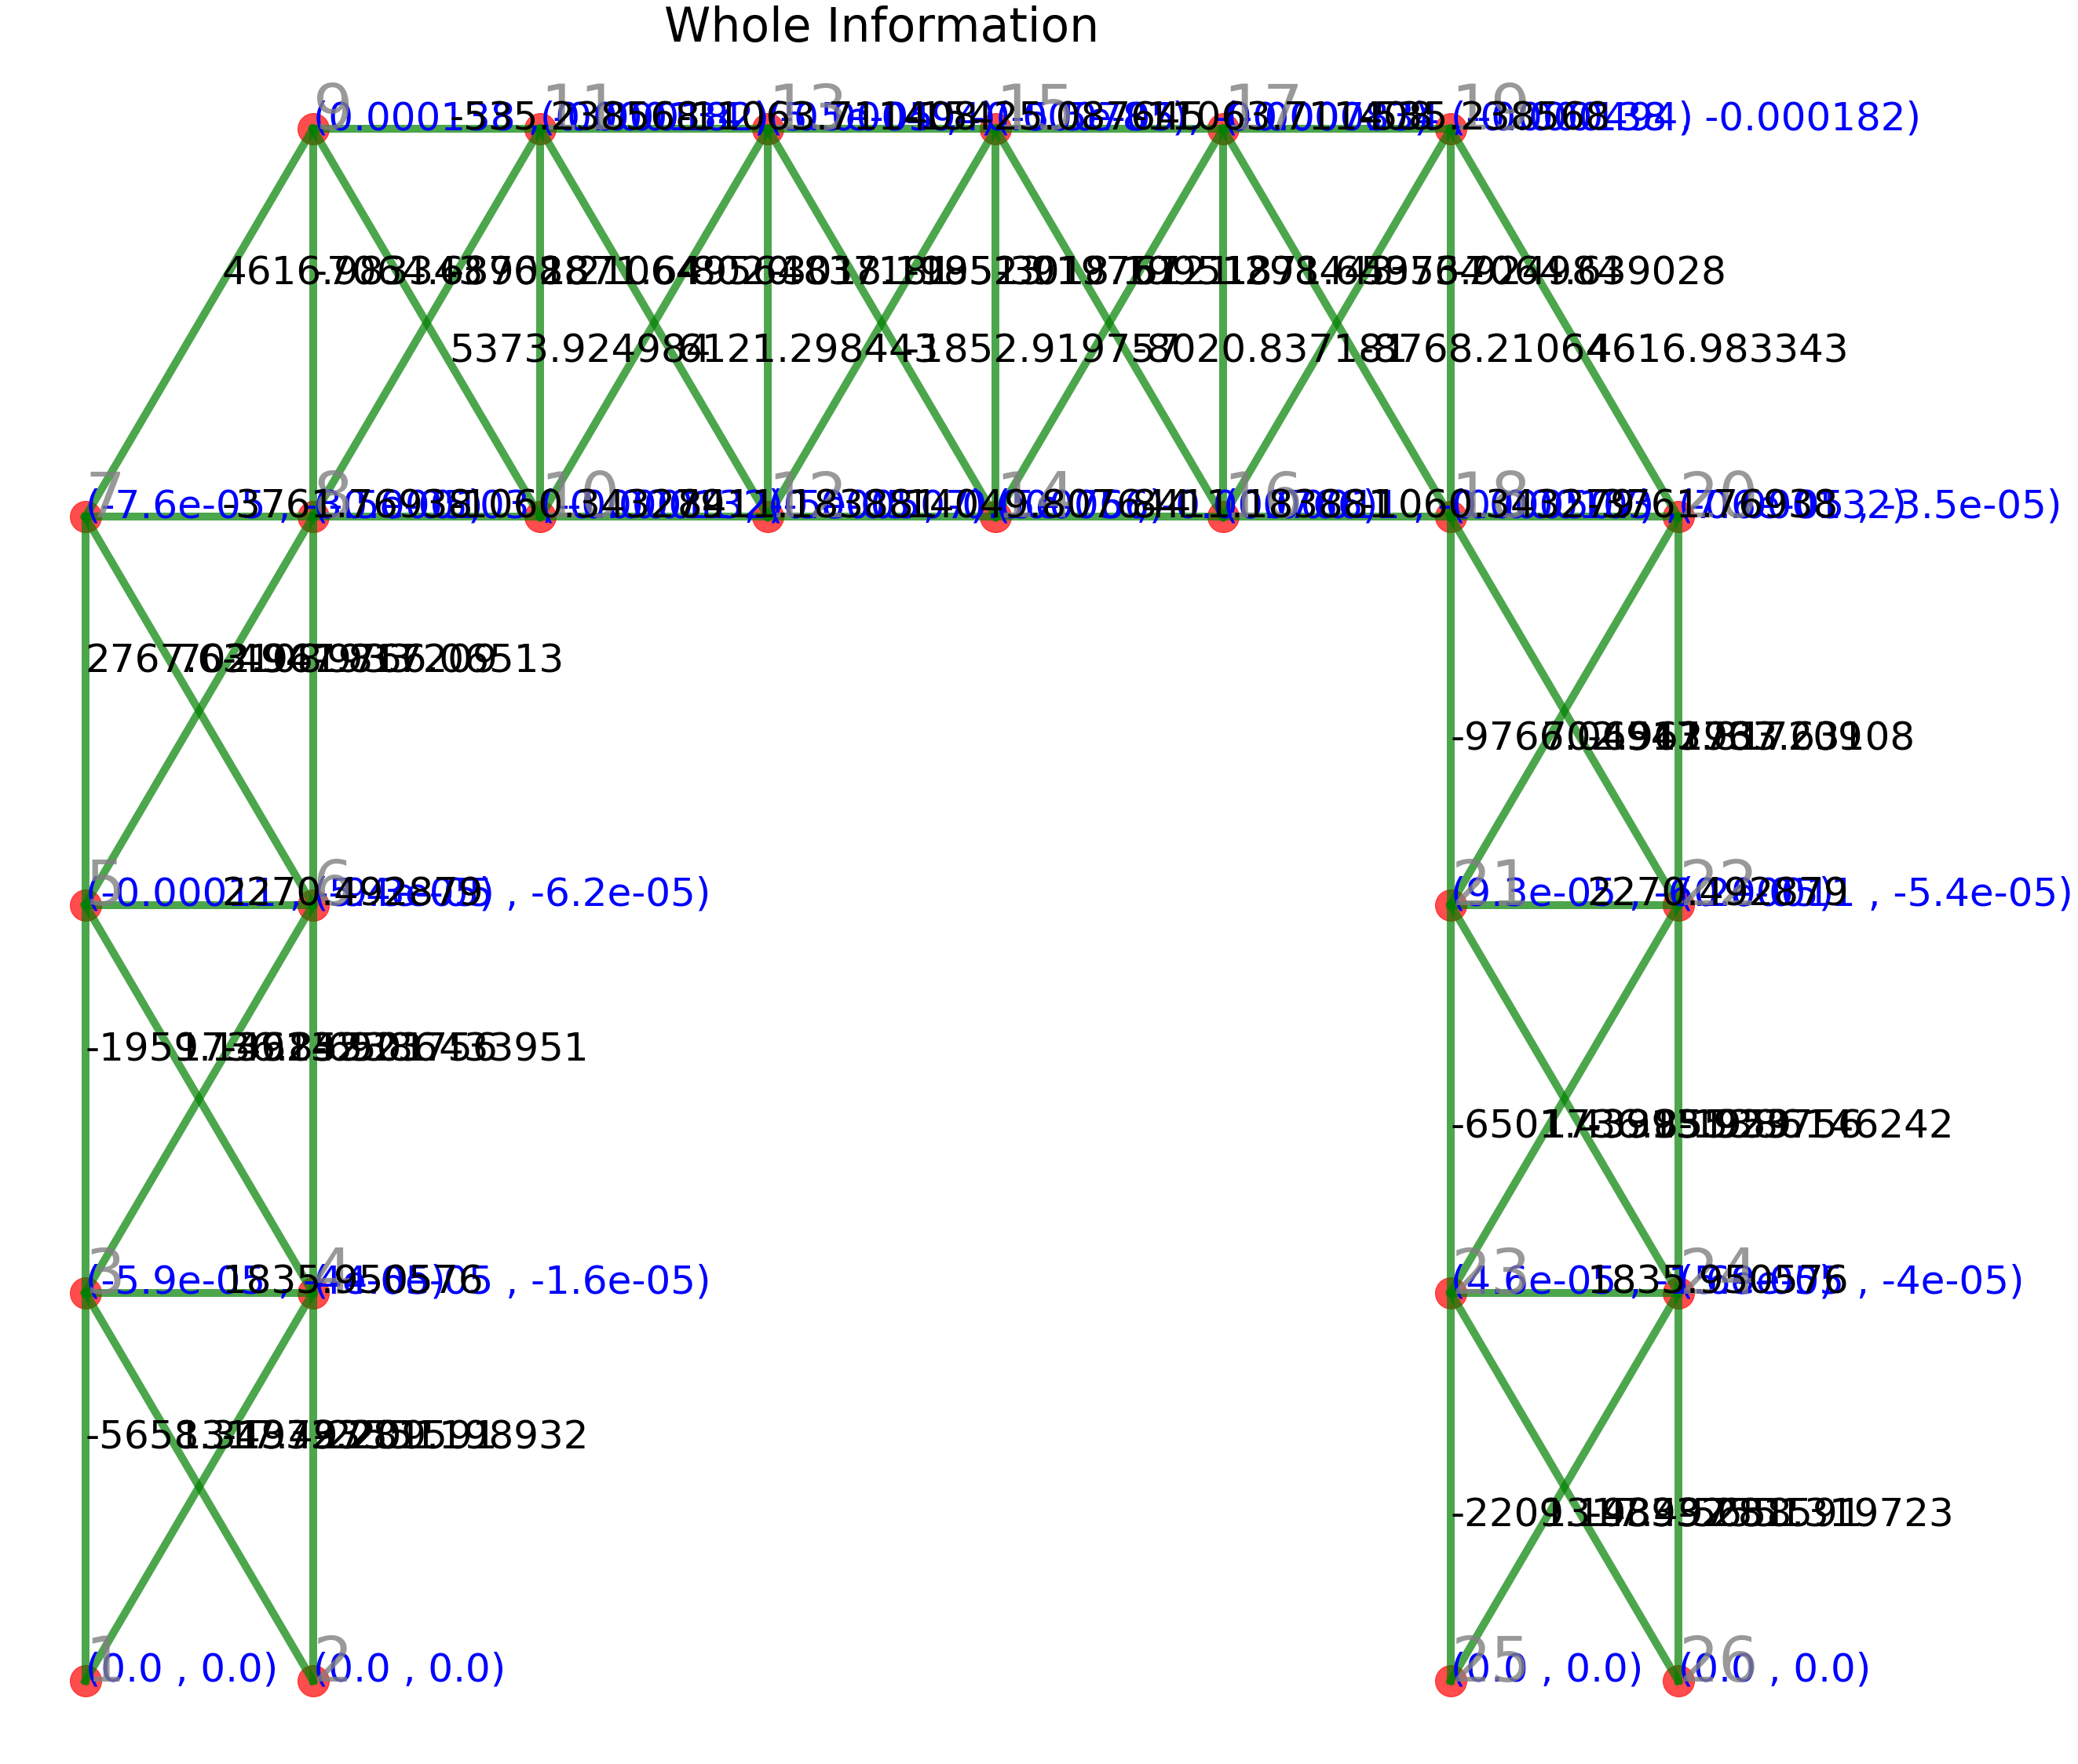

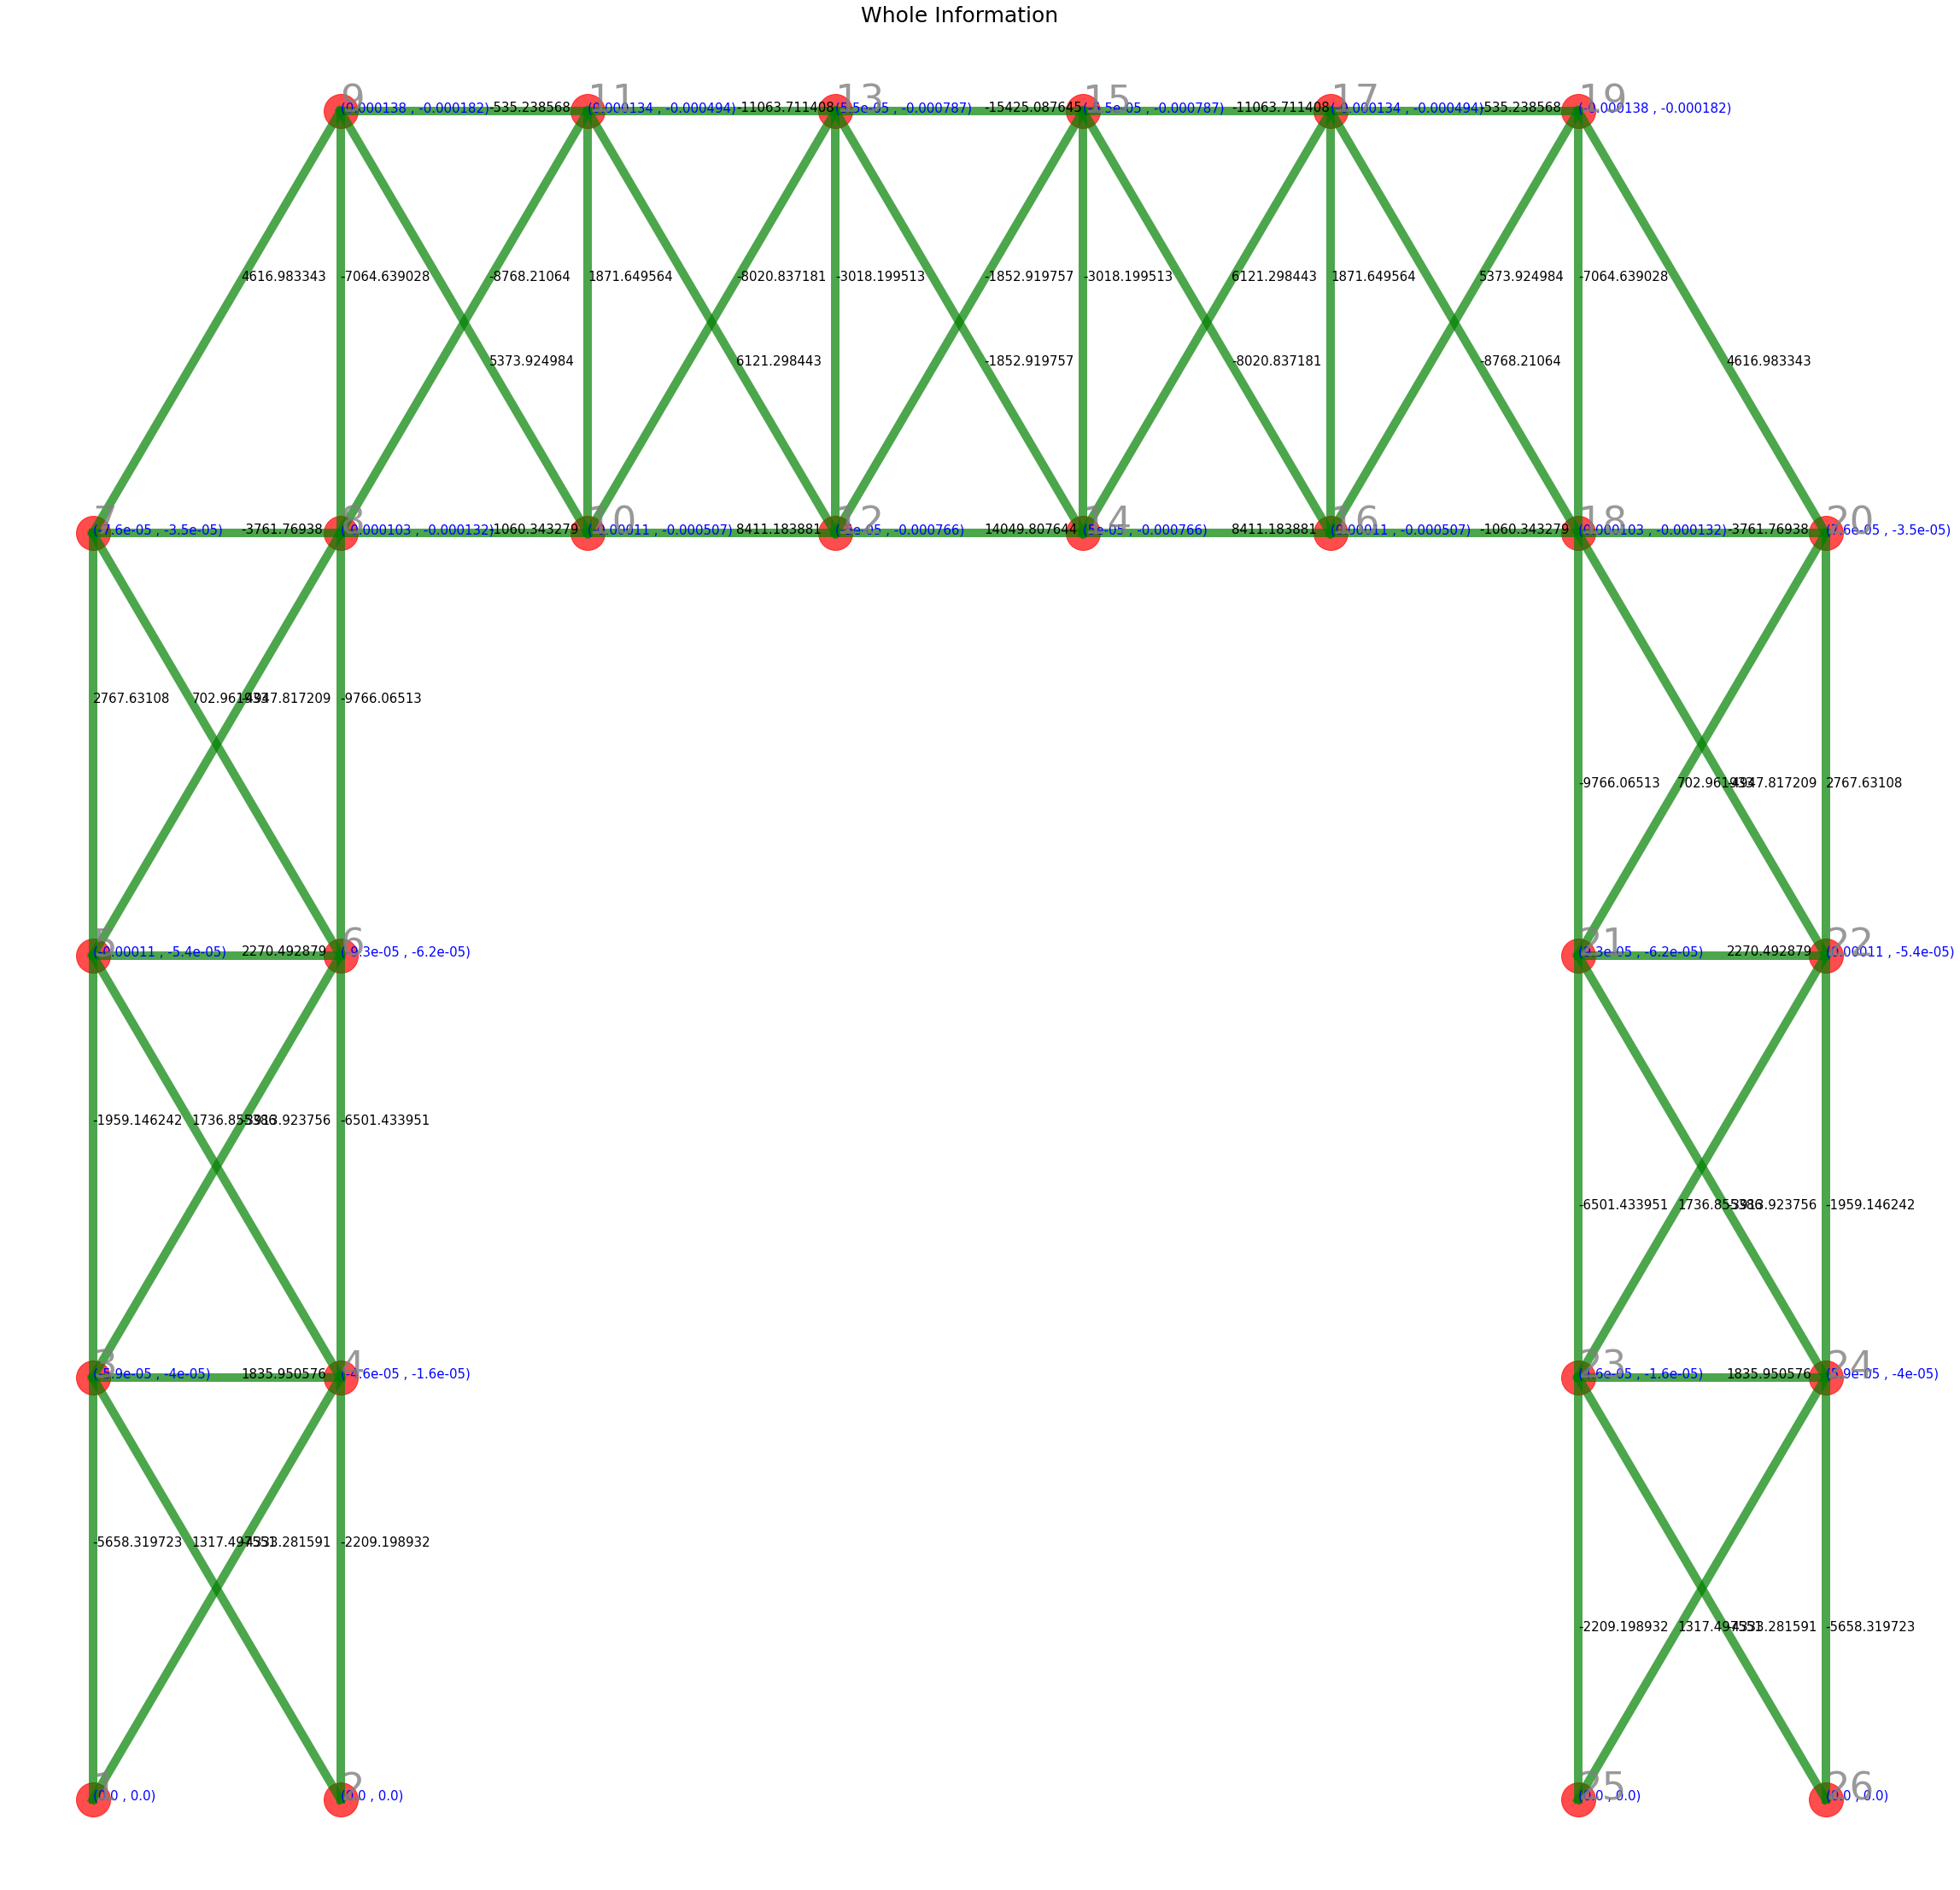

In [10]:
sys.solve() # 系统求解
sys.getpic(ftsize = 15) # 得到系统图片
sys.export('hw.txt' , 'hw.png') # 导出报告以及图片